## Random Forest Regression

Predicted salary for level 6.5: 180000.0


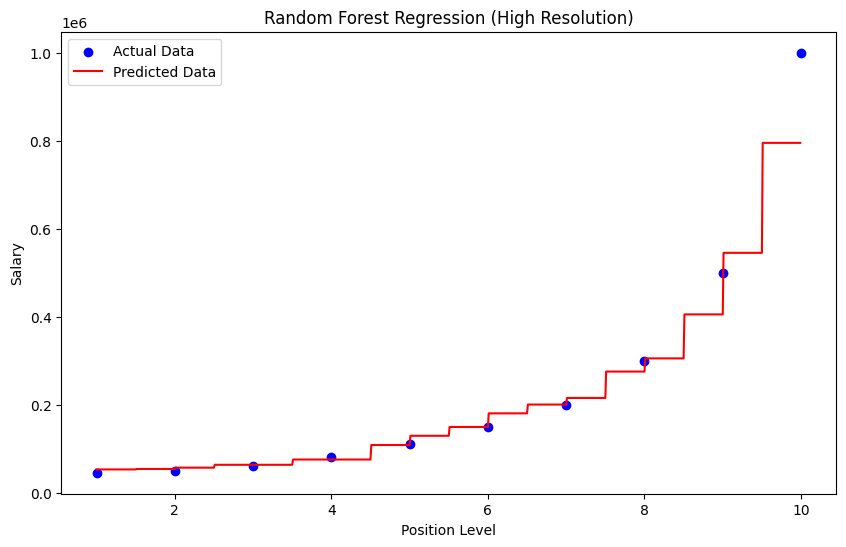

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../datasets/position-salaries.csv')

# Extract features and target variable
X = data.iloc[:, 1:2].values  # Feature: Level
y = data.iloc[:, 2].values  # Target: Salary

# Apply random forest regression
from sklearn.ensemble import RandomForestRegressor

# Create and fit the model
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(X, y)

# Making predictions
y_pred = rf_regressor.predict(X)

# Predict for a specific value
predicted_salary = rf_regressor.predict([[6.5]])
print(f"Predicted salary for level 6.5: {predicted_salary[0]}")


# Visualizing with a higher resolution
X_grid = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_grid, rf_regressor.predict(X_grid), color='red', label='Predicted Data')
plt.title('Random Forest Regression (High Resolution)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        63
           1       0.83      0.92      0.87        37

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.90      0.90       100

Accuracy: 0.90
Recall: 0.92
Precision: 0.83
Confusion Matrix:
 [[56  7]
 [ 3 34]]


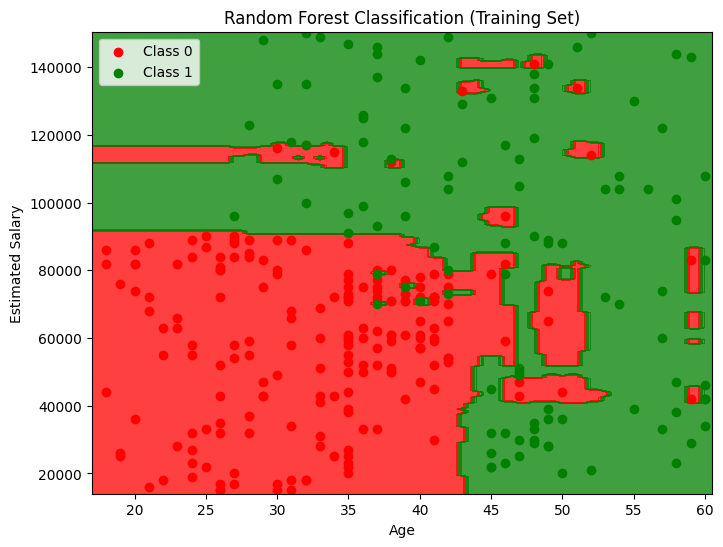

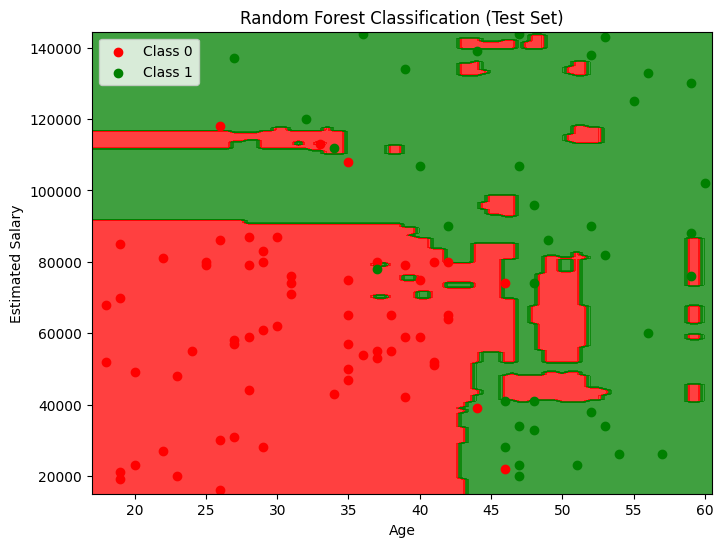

In [8]:
# Goal: Use random forest classification to predict whether a user will purchase based on age and estimated salary.

# Load the dataset
dataset = pd.read_csv('../datasets/social-network-ads.csv')

# split into features and target
X = dataset.iloc[:, :-1].values  # Features: Age, EstimatedSalary
y = dataset.iloc[:, -1].values  # Target: Purchased

# split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# recall means the percentage of actual positives that were correctly identified
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# precision means the percentage of predicted positives that were actually positive
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(X, y, model, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.5),
        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=500)
    )
    grid_points = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(grid_points).reshape(X1.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    colors = ['red', 'green']
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0], X_set[y_set == j, 1],
            color=colors[i], label=f'Class {j}'
        )
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()
    
# Training set decision boundary
plot_decision_boundary(X_train, y_train, classifier, "Random Forest Classification (Training Set)")

# Test set decision boundary
plot_decision_boundary(X_test, y_test, classifier, "Random Forest Classification (Test Set)")


